Iteration:  0
[810 245]
Iteration:  1
[353 847]
Iteration:  2
[128 409]
Iteration:  3
[456 207]
Iteration:  4
[518 130]
Iteration:  5
[115 456]
Iteration:  6
[895 489]
Iteration:  7
[ 57 666]
Iteration:  8
[471 765]
Iteration:  9
[648 396]
Iteration:  10
[879 577]
Iteration:  11
[324 647]
Iteration:  12
[227 679]
Iteration:  13
[515 586]
Iteration:  14
[230 444]
Iteration:  15
[170 869]
Iteration:  16
[251 179]
Iteration:  17
[392 446]
Iteration:  18
[841 156]
Iteration:  19
[637 805]
Iteration:  20
[381 162]
Iteration:  21
[396 863]
Iteration:  22
[927  69]
Iteration:  23
[716 901]
Iteration:  24
[602 496]
Iteration:  25
[827 344]
Iteration:  26
[408 541]
Iteration:  27
[905 881]
Iteration:  28
[416 264]
Iteration:  29
[542 500]
Iteration:  30
[285 617]
Iteration:  31
[958 701]
Iteration:  32
[153 353]
Iteration:  33
[732 411]
Iteration:  34
[667 280]
Iteration:  35
[567 194]
Iteration:  36
[780 652]
Iteration:  37
[686 421]
Iteration:  38
[711 595]
Iteration:  39
[321 523]
Iteration:

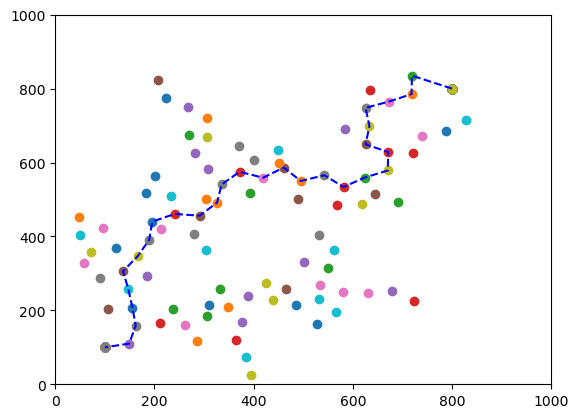

In [2]:
from PIL import Image, ImageOps
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as rcParams
import time
np.set_printoptions(precision=3, suppress=True)
# initial Input 
class Robot_Configuration:
    def Define_dimension(self) :
        self.Dimension=6
    def Start_q(self): #6축 조인트각을 변환해야함.
        self.s_q=np.array([100, 100])
        
    def End_q(self): #6축 조인트각을 변환해야함.
        self.E_q=np.array([800, 800])
        
    def Joints_min_max(self): 
        # joint 최대 값과 최소값을 정의해야함.
        self.upper_limits=np.array([1000,1000])
        self.lower_limits=np.array([1000,1000])
        



# treenode class 
   
class treeNode:
    def __init__(self, q):
        self.q=q
        self.children=[]
        self.parent=None
        self.end_parent=0

# RRT_Algorithm class definition

class RRT_Algorithm:
    def __init__(self, numIterations, stepSize, Robot_config):
        self.RC=Robot_Configuration(Robot_config)
        self.randomTree= treeNode(self.RC.s_q)
        self.goal=treeNode(self.RC.E_q)
        self.nearestNode = None
        self.iterations = numIterations
        self.rho=stepSize
        self.path_distance = 0
        self.nearestDist = 10000
        self.numWaypoints=0
        self.Waypoints=[]
        # Define functions 

    def addChild(self,q):
        if type(q)==treeNode:
            tempNode=q
            self.nearestNode.children.append(tempNode)
            tempNode.parent=self.nearestNode
        else: 
            tempNode=treeNode(q)
            self.nearestNode.children.append(tempNode)
            tempNode.parent=self.nearestNode
    
    
        
    # 난수 생성
    def sampleAPoint(self):
        q1=np.random.randint(self.RC.lower_limits[0], self.RC.upper_limits[0], size=1)
        q2=np.random.randint(self.RC.lower_limits[1], self.RC.upper_limits[1], size=1)
        q3=np.random.randint(self.RC.lower_limits[2], self.RC.upper_limits[2], size=1)
        q4=np.random.randint(self.RC.lower_limits[3], self.RC.upper_limits[3], size=1)
        q5=np.random.randint(self.RC.lower_limits[4], self.RC.upper_limits[4], size=1)
        q6=np.random.randint(self.RC.lower_limits[5], self.RC.upper_limits[5], size=1)
       
        sample_q=np.array(q1[0],q2[0],q3[0],q4[0],q5[0],q6[0])
        return sample_q
        
        pass
    def steerToPoint(self, Node_current, q_end):
        q_unit=self.unitVector(Node_current.q, q_end)
        q_new=Node_current.q+self.rho*q_unit
        return q_new
    
    def unitVector(self, q_current, q_end):
        random_vector=q_end-q_current
        unit_vector=random_vector/np.linalg.norm(random_vector,2)
        return unit_vector
        
    def findNearest(self, root, point):
        if not root:
            return
        dist=self.distance(root, point)
        if dist<= self.nearestDist:
            self.nearestNode=root
            self.nearestDist=dist
        for child in root.children:
            self.findNearest(child, point)
        pass
    def distance(self, node1, point):
        dist=node1.q-point
        dist=np.linalg.norm(dist,2)
        return dist
        
    def goalFound(self, point):
        if self.distance(self.goal, point) <= self.rho:
            return True
        pass
        
    def resetNearestValues(self):
        self.nearestNode=None
        self.nearestDist=10000
 
        
    def retraceRRTPath(self, goal):
        if goal.q.all==self.randomTree.q.all: 
            return
        self.numWaypoints+=1
        currentPoint=goal.q
        self.Waypoints.insert(self.numWaypoints,currentPoint)
        self.path_distance+=self.rho
        self.retraceRRTPath(goal.parent)


# Plot for Algorithm visualization 

rrt= RRT_Algorithm(10000, 50)
s=Start_q()
e=End_q()
plt.plot(s[0],s[1],'o')
plt.plot(e[0],e[1],'o')

for i in range(rrt.iterations): 
    rrt.resetNearestValues()
    print("Iteration: ", i)
    #print(rrt.grid)
    #print(rrt.randomTree.q[0])
    point=rrt.sampleAPoint()   
    rrt.findNearest(rrt.randomTree, point)
    new = rrt.steerToPoint(rrt.nearestNode, point)
    if (rrt.goalFound(new)):
        rrt.addChild(rrt.goal)
        print("goal found")
        break
    rrt.addChild(new)
    plt.plot(s[0],s[1],'o')
    plt.plot(e[0],e[1],'o')
    plt.plot(new[0],new[1],'o')
    #plt.plot([rrt.nearestNode.q[0], new[0]], [rrt.nearestNode.q[1], new[1]], 'go', linestyle="--")


rrt.retraceRRTPath(rrt.goal)
rrt.Waypoints.insert(0,Start_q())


#waypoints = np.array(rrt.Waypoints)
xlist=[]
ylist=[]

for i in range (1, rrt.numWaypoints+1):  
    xlist.append(rrt.Waypoints[i][0])
    ylist.append(rrt.Waypoints[i][1])
    #time.sleep(1)
xlist.append(Start_q()[0])
ylist.append(Start_q()[1])

plt.axis([0, grid()[0], 0, grid()[1] ])
plt.plot(xlist, ylist, 'b--')
plt.show()